In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils

In [97]:
data = pd.read_csv('./mnist_train.csv')

In [98]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print (type(data))
print (data.shape)

<class 'pandas.core.frame.DataFrame'>
(59999, 785)


In [12]:
data = data.values
print (type(data))
print (data.shape)

<type 'numpy.ndarray'>
(59999, 785)


In [13]:
X_train = data[:,1:]
Y_train = data[:,0]

0


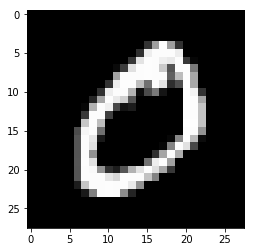

In [14]:
plt.imshow( np.reshape(X_train[0], (28,28) ), cmap = 'gray' )
plt.plot()
print (Y_train[0])

In [84]:
model = Sequential()

In [85]:
model.add( Dense( 128, input_shape = (784,) ) )
model.add( Activation('relu') )
model.add( Dense( 64 ) )
model.add( Activation('relu') )
model.add( Dropout(0.4) )
model.add( Dense(10) )
model.add( Activation('softmax') )

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_13 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total para

In [18]:
X_train = X_train/255.0

In [20]:
X_train = X_train[:4000]
Y_train = Y_train[:4000]

In [90]:
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [24]:
Y_train_new = np_utils.to_categorical( Y_train )

In [25]:
print ( Y_train_new.shape )

(4000, 10)


In [91]:
model.fit( X_train, Y_train_new, batch_size=16, epochs=15, shuffle=True )

Epoch 1/15
4000/4000 [==============================] - 1s 305us/step - loss: 0.2561 - acc: 0.9263
Epoch 2/15
4000/4000 [==============================] - 1s 214us/step - loss: 0.1974 - acc: 0.9415
Epoch 3/15
4000/4000 [==============================] - 1s 220us/step - loss: 0.1472 - acc: 0.9550
Epoch 4/15
4000/4000 [==============================] - 1s 219us/step - loss: 0.1314 - acc: 0.9575
Epoch 5/15
4000/4000 [==============================] - 1s 220us/step - loss: 0.1147 - acc: 0.9667
Epoch 6/15
4000/4000 [==============================] - 1s 219us/step - loss: 0.0845 - acc: 0.9750
Epoch 7/15
4000/4000 [==============================] - 1s 221us/step - loss: 0.0732 - acc: 0.9783
Epoch 8/15
4000/4000 [==============================] - 1s 219us/step - loss: 0.0548 - acc: 0.9860
Epoch 9/15
4000/4000 [==============================] - 1s 223us/step - loss: 0.0663 - acc: 0.9770
Epoch 10/15
4000/4000 [==============================] - 1s 222us/step - loss: 0.0557 - acc: 0.9832
Epoch 11/

In [99]:
out = model.predict( np.reshape( X_train[0], (1,784) ) )

In [100]:
print out
print ( np.argmax( out[0] ) )

[[9.9999976e-01 1.4509196e-12 8.0860531e-08 6.8547765e-11 5.7561031e-12
  1.0901119e-08 4.4329873e-09 3.3286110e-10 1.9912141e-09 1.2734343e-07]]
0


In [40]:
test_data = pd.read_csv('./mnist_test.csv')

In [41]:
test_data = test_data.values

In [51]:
X_test = test_data[:,1:]/255.0
Y_test = test_data[:,0]

In [52]:
X_test.shape, Y_test.shape

((9999, 784), (9999,))

In [92]:
def acc(outputs, Y_true):
    ans = 0.0
    for i in range(Y_true.shape[0]):
        ans += np.argmax( outputs[i] ) == Y_true[i]
    ans = ans / Y_true.shape[0]
    return ans

In [93]:
test_pred = model.predict( X_test )

In [94]:
print ( acc(test_pred, Y_test) )

0.9314931493149315
